<a href="https://colab.research.google.com/github/aidaaminian/snn-self-driving/blob/main/bproj-noise-maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and Import

In [1]:
!gdown --id 1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm
To: /content/traffic-sign-yolo.zip
100% 261M/261M [00:03<00:00, 86.6MB/s]


In [ ]:
!unzip "/content/traffic-sign-yolo.zip" -d "/content/"

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage

### Add Noise

In [4]:
IMG_HEIGHT = 240
IMG_WIDTH = 240

In [5]:
import cv2
import glob
image_list = []
for filename in sorted(glob.glob('/content/traffic-sign-yolo/*.jpg')):
    image = cv2.imread (filename)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image,(240,240))
    image_list.append (image)

### Data Preprocessing

In [6]:
np.array(image_list).shape

(741, 240, 240, 3)

In [ ]:
image_list

In [8]:
image_list = np.array(image_list, dtype=np.float32) /255

In [9]:
noise_data = skimage.util.random_noise(image_list, mode="gaussian")

In [ ]:
noise_data

In [11]:
new_images = np.array(noise_data*255, dtype=np.uint8)

In [ ]:
new_images

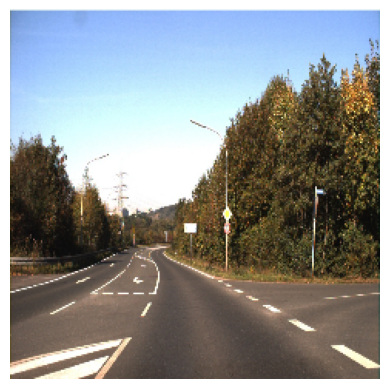

In [13]:
plt.imshow(image_list[8])
plt.axis('off')
plt.show()

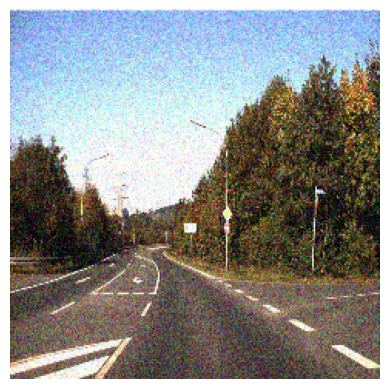

In [14]:
plt.imshow(new_images[8])
plt.axis('off')
plt.show()

In [15]:
!mkdir ts_noise

In [16]:
for i in range(len(new_images)):
  cv2.imwrite("/content/ts_noise/" + "{:05d}".format(i) + ".jpg" , new_images[i])

In [ ]:
!zip -r ts-noise '/content/ts_noise/'

### Draw Bounding Box

In [17]:
img_bgr = cv2.imread('/content/ts_noise/00023' + '.jpg')

In [18]:
img_bgr.shape

(240, 240, 3)

In [19]:
with open('/content/traffic-sign-yolo/00023' + '.txt') as f:
    box_list = []
    for line in f:
        box_list += [line.rstrip()]

In [20]:
h, w = img_bgr.shape[:2]
c_names = ['prohibitory', 'danger', 'mandatory', 'other']
c_colors = [[0,0,255], [255,255,0], [0,255,0], [255,0,0]]

In [21]:
for i in range(len(box_list)):
    box_args = box_list[i].split()
    x_center, y_center = int(float(box_args[1]) * w), int(float(box_args[2]) * h)
    w_box, h_box = int(float(box_args[3]) * w), int(float(box_args[4]) * h)
    x_min = int(x_center - (w_box / 2))
    y_min = int(y_center - (h_box / 2))
    cv2.rectangle(img_bgr, (x_min, y_min), (x_min + w_box, y_min + h_box), c_colors[int(box_args[0])], 2)
    class_current = c_names[int(box_args[0])]
    cv2.putText(img_bgr, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, c_colors[int(box_args[0])], 2)

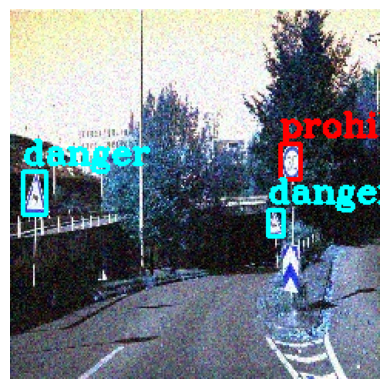

In [22]:
fig = plt.figure()
plt.rcParams.update({'font.size': 5})
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()